# Simple Neural Network Using Fashion MNIST dataset

Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). Similar to MNIST dataset, comes packaged with keras! The following Figure shows sample images of fashion MNIST dataset. 

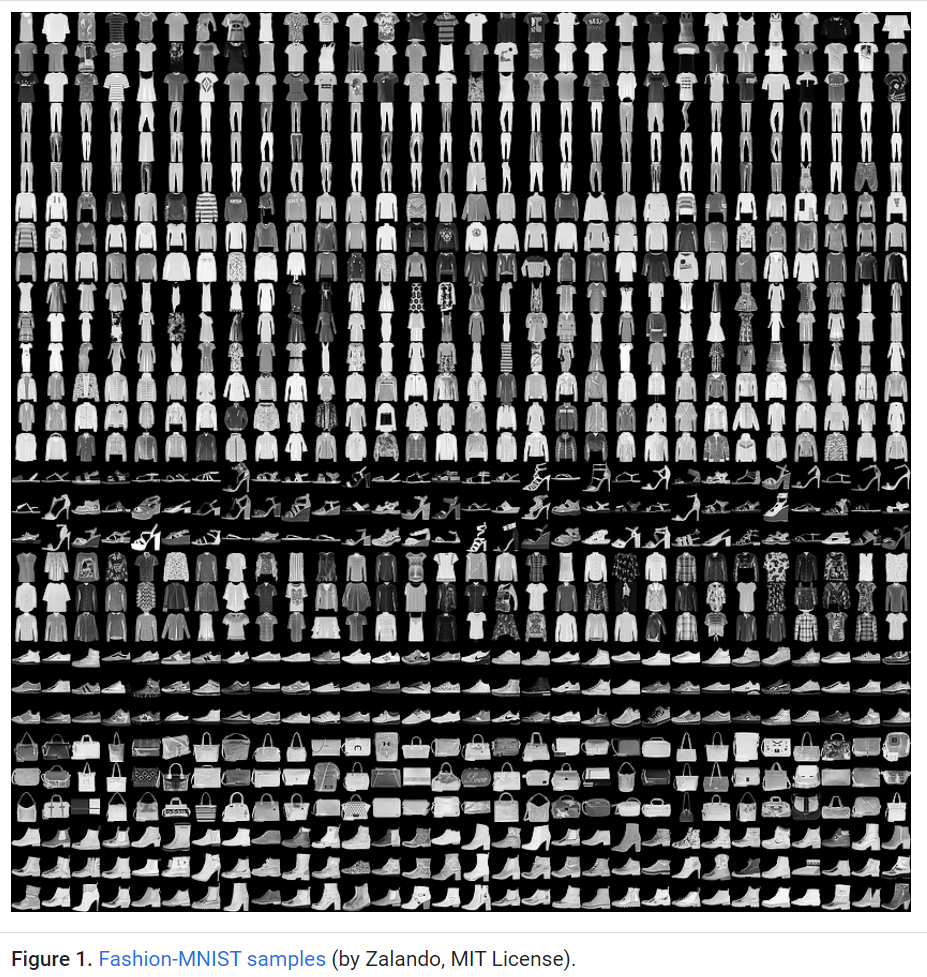

The class names of the fashion MNIST are as follow. 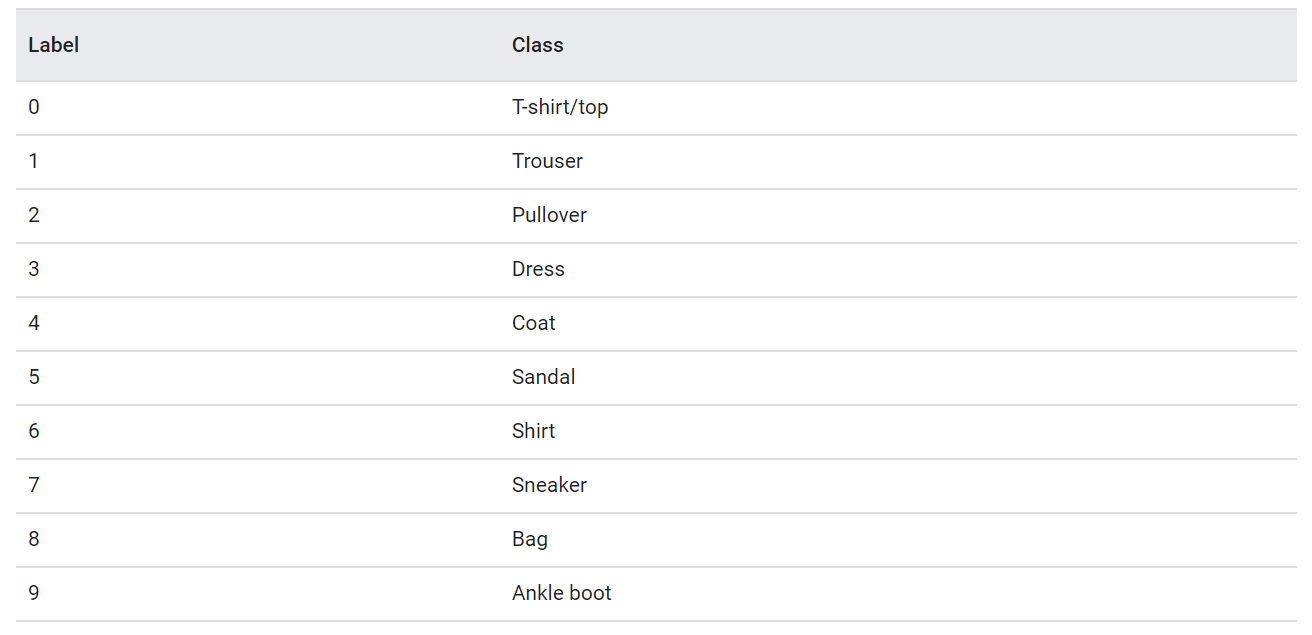


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Task 1: Load the Fashion MNIST dataset using keras. Then separate the loaded data into two sets training (train_images, train_labels) and testing (test_images, test_labels). Write your code in the following cell. 

In [8]:
# write code for task 1 here

from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

Task 2: Write the codes to check how many images and labels in the training and testing set.

In [9]:
#  write code for task 2 here

print("train_images:", train_images.shape[0])
print("train_labels:", train_labels.shape[0])
print("test_images:", test_images.shape[0])
print("test_labels:", test_labels.shape[0])

train_images: 60000
train_labels: 60000
test_images: 10000
test_labels: 10000


Task 3: Plot the top 25 images and label the associated class name.


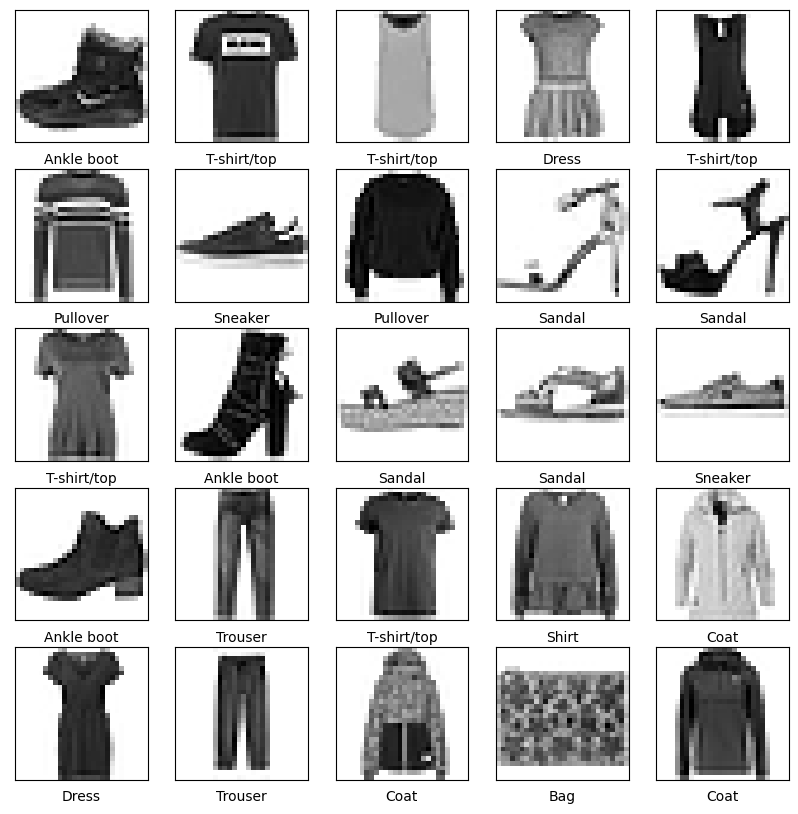

In [10]:
# write code for task 3 here

from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.get_cmap('binary'))
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Task 4: Create a simple neural network containing five layers and show its summary.

In [11]:
# write code for task 4 here

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Task 5: To train your neural network, identify what optimizer, loss function and metrics will you use.

In [12]:
# write code for task 5 here

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Task 6: Train your model until you get the best training accuracy and evaluate the model using test set.

In [13]:
# # write code for task 6 here

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print("train_images shape:", train_images.shape)
print("test_images shape:", test_images.shape)

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)

batch_size = 256
epochs = 200

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                   steps_per_epoch = train_images.shape[0]//batch_size, 
                   validation_data = (test_images, test_labels), 
                   validation_steps = test_images.shape[0]//batch_size, verbose = 1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test acc:', test_acc)

train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)
train_labels shape: (60000, 10)
test_labels shape: (10000, 10)
Epoch 1/200
234/234 [==============================] - 2s 6ms/step - loss: 3.8614 - accuracy: 0.6911 - val_loss: 1.3961 - val_accuracy: 0.7577
Epoch 2/200
234/234 [==============================] - 1s 5ms/step - loss: 1.0874 - accuracy: 0.7949 - val_loss: 1.0477 - val_accuracy: 0.7890
Epoch 3/200
234/234 [==============================] - 1s 5ms/step - loss: 0.8747 - accuracy: 0.8222 - val_loss: 0.9160 - val_accuracy: 0.8142
Epoch 4/200
234/234 [==============================] - 1s 6ms/step - loss: 0.7936 - accuracy: 0.8349 - val_loss: 0.8518 - val_accuracy: 0.8177
Epoch 5/200
234/234 [==============================] - 1s 5ms/step - loss: 0.7164 - accuracy: 0.8514 - val_loss: 0.7980 - val_accuracy: 0.8269
Epoch 6/200
234/234 [==============================] - 1s 5ms/step - loss: 0.6743 - accuracy: 0.8588 - val_loss: 0.7540 - val_accuracy: 0.8365
Epoch 7/

234/234 [==============================] - 1s 6ms/step - loss: 0.3143 - accuracy: 0.9099 - val_loss: 0.4219 - val_accuracy: 0.8759
Epoch 58/200
234/234 [==============================] - 1s 5ms/step - loss: 0.3067 - accuracy: 0.9119 - val_loss: 0.4436 - val_accuracy: 0.8746
Epoch 59/200
234/234 [==============================] - 1s 5ms/step - loss: 0.3002 - accuracy: 0.9142 - val_loss: 0.4295 - val_accuracy: 0.8751
Epoch 60/200
234/234 [==============================] - 1s 5ms/step - loss: 0.3097 - accuracy: 0.9095 - val_loss: 0.4351 - val_accuracy: 0.8783
Epoch 61/200
234/234 [==============================] - 1s 4ms/step - loss: 0.2987 - accuracy: 0.9138 - val_loss: 0.4473 - val_accuracy: 0.8743
Epoch 62/200
234/234 [==============================] - 1s 4ms/step - loss: 0.2969 - accuracy: 0.9145 - val_loss: 0.4363 - val_accuracy: 0.8751
Epoch 63/200
234/234 [==============================] - 1s 5ms/step - loss: 0.3051 - accuracy: 0.9125 - val_loss: 0.4474 - val_accuracy: 0.8769
Epoch

Epoch 114/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2769 - accuracy: 0.9219 - val_loss: 0.4293 - val_accuracy: 0.8816
Epoch 115/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2775 - accuracy: 0.9206 - val_loss: 0.4704 - val_accuracy: 0.8702
Epoch 116/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2795 - accuracy: 0.9213 - val_loss: 0.4345 - val_accuracy: 0.8790
Epoch 117/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2767 - accuracy: 0.9219 - val_loss: 0.4493 - val_accuracy: 0.8754
Epoch 118/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2781 - accuracy: 0.9224 - val_loss: 0.4493 - val_accuracy: 0.8804
Epoch 119/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2795 - accuracy: 0.9207 - val_loss: 0.4400 - val_accuracy: 0.8781
Epoch 120/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2708 - accuracy: 0.9233 - val_loss: 0.4366 - val_ac

234/234 [==============================] - 1s 5ms/step - loss: 0.2654 - accuracy: 0.9256 - val_loss: 0.4512 - val_accuracy: 0.8767
Epoch 171/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2707 - accuracy: 0.9242 - val_loss: 0.4494 - val_accuracy: 0.8771
Epoch 172/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2686 - accuracy: 0.9247 - val_loss: 0.4579 - val_accuracy: 0.8796
Epoch 173/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2660 - accuracy: 0.9253 - val_loss: 0.4611 - val_accuracy: 0.8761
Epoch 174/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2703 - accuracy: 0.9269 - val_loss: 0.4582 - val_accuracy: 0.8814
Epoch 175/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2716 - accuracy: 0.9250 - val_loss: 0.4462 - val_accuracy: 0.8847
Epoch 176/200
234/234 [==============================] - 1s 5ms/step - loss: 0.2569 - accuracy: 0.9294 - val_loss: 0.4646 - val_accuracy: 0.8760

Task 7: Select 50th image of the test set and predict its class using your trained model.

Predicted class: Pullover
True label: 2
Correct


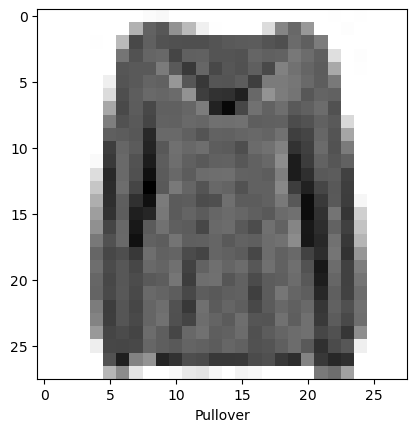

In [19]:
# write code for task 7 here

import numpy as np

i = 49

image = test_images[i]
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)

class_index = np.argmax(prediction[0])

class_name = class_names[class_index]
print("Predicted class:", class_name)

true_label = np.argmax(test_labels[i])
print("True label:", true_label)

if class_index == true_label:
    print("Correct")
else:
    print("Incorrect")

    
import matplotlib.pyplot as plt

selected_image = test_images[i]
plt.imshow(selected_image, cmap='binary')
true_class_label = np.argmax(test_labels[i])
plt.xlabel(class_names[true_class_label])
plt.show()

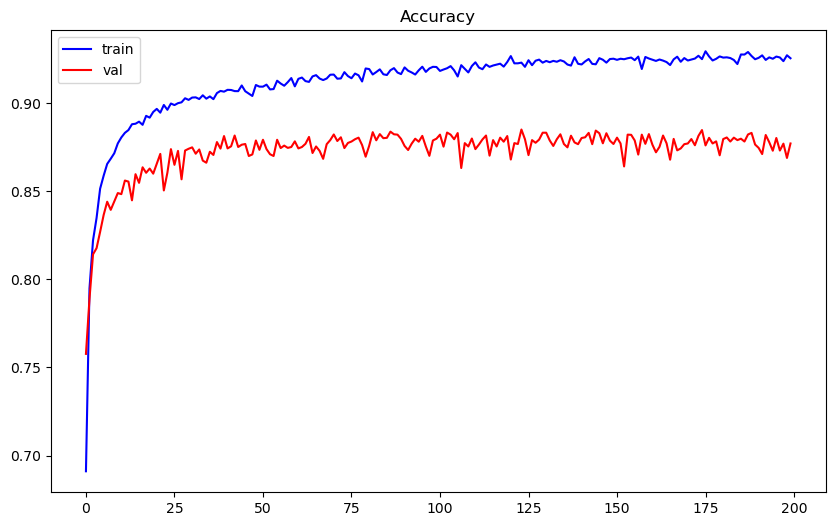

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
plt.legend()
plt.title('Accuracy')
plt.show()

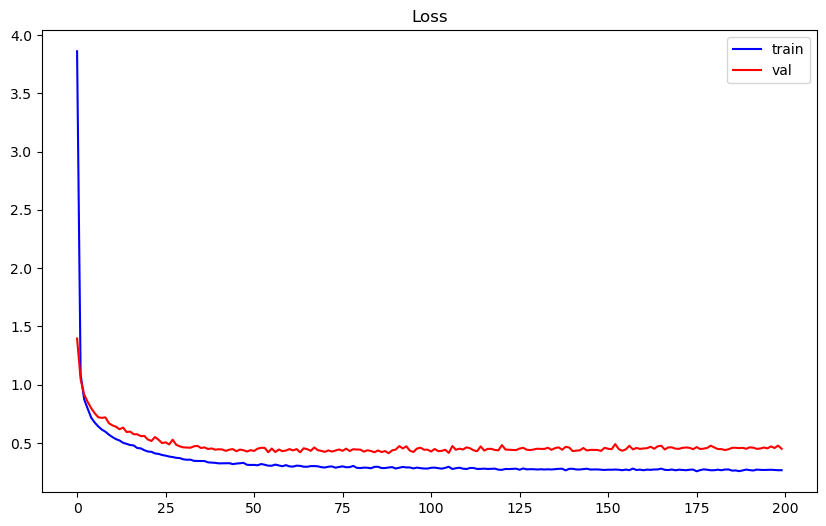

In [16]:
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'red', label = 'val')
plt.legend()
plt.title('Loss')
plt.show()